u0=4.6829419696157935
f(x)=3*x^0.5 + 2*sin(x)
df(x)=1.5*x^(-0.5) + 2*cos(x)
g(x)=1.5*x^(-0.5) - 3*x^0.5 - 2*sin(x) + 2*cos(x)
true


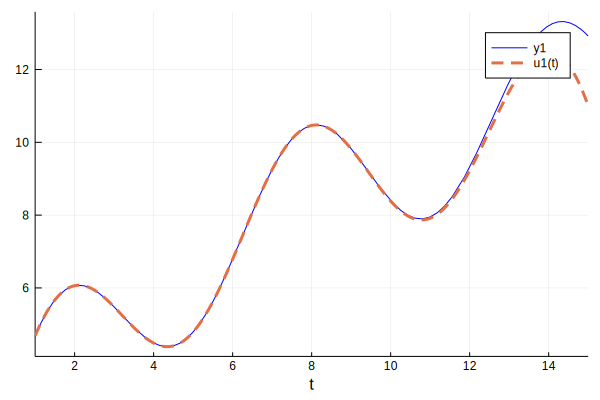

In [276]:
# dI (t) = −α_1*I(t) − α_2*I(t)^2 + (α_3 * I(t) + q) * I (t)^(1−(1/n))
using SymPy
using Plots
using DifferentialEquations
@vars x

f(x)=2*sin(x)+3*x^(1/2)
u0 = f(1)
println("u0=",u0)

p1 = plot(f, grid=false, 1,30)

df = diff(f)

#df(x) = df(x)+f(x)-f(x) = f(x)+g(x)

g(x) = df(x)-f(x)
println("f(x)=",f(x))
println("df(x)=",df(x))
println("g(x)=",g(x))
println(df(x)==f(x)+g(x))

F(u,p,t) = u + 1.5*t^(-0.5) - 3*t^0.5 - 2*sin(t) + 2*cos(t)


tspan = (1.0,15.0)
prob = ODEProblem(F,u0,tspan)

sol = DF.solve(prob)

graph = plot(f, tspan[1], tspan[2], color="blue")
plot!(graph, sol, ls=:dash)

In [306]:
using CSV
using StatsPlots

data = CSV.read("dataset/kami.csv")
graph = @df data plot(:x,:y)

#dI (t) = −a_1*I(t) − a_2*I(t)^2 + (a_3 * I(t) + q) * I (t)^(1−(1/n))

@vars I a1 a2 a3 q n

dI = -a1*I - a2*I^2 + (a3 * I + q) * I^(1-(1/n))

println(dI)
function find_fit(values, equa_diff, func, variable, params_span, step=10, n_adns=100)
    adns = create_adns(params_span, n_adns)
    n_mutants = floor(Int, n_adns*0.15)
    n_childs = floor(Int, n_adns*0.15)
    n_parents = floor(Int, (n_adns-n_mutants-n_childs)*0.3)
    
    for i in 1:step
        scores = get_scores(adns, values, equa_diff, func, variable)
        sort!(scores, by=el->el[2])
        println("best = ", scores[end])
        
        scores = scores[n_mutants+n_childs:end]
        adns = [score[1] for score in scores]
        
        new_mutants = create_adns(params_span, n_mutants)
        new_childs = create_childs(adns, n_childs, n_parents)
        adns = vcat(new_mutants, new_childs, adns)
    end
end

function get_scores(adns, values, equa_diff, func, variable)
    scores = []
    for adn in adns
        f = subs(equa_diff, adn...)
        f = lambdify(f, (func, variable))
        F(u,_,t) = f(u,t)
        push!(scores, (adn, 10))
    end
    
    return scores
end

function create_adns(params_span, n_adns)
    adns = []
    for _ in 1:n_adns
        adn = [(var, rand(span)) for (var, span) in params_span]
        push!(adns, adn)
    end
    return adns
end

function create_childs(adns, childs, parents)
    
end

t0 = data[:,1][1]
t_end = data[:,1][end]
u0 = data[:,2][1]

params_span = [
    (a1,-10:eps():10),
    (a2,-10:eps():10),
    (a3,-10:eps():10),
    (q,-10:eps():10),
    (n,-10:eps():10)];

find_fit(nothing, dI, I, t, params_span)

-I^2*a2 - I*a1 + I^(1 - 1/n)*(I*a3 + q)
I^0.611431105378692*(5.08117099111749*I + 8.9639575951049) - 2.25985858322236*I^2 - 5.15631062280167*I
-33.23092217341332
-33.23092217341332
6.628959380198358
